In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

import pandas as pd

In [3]:
df = pd.read_excel("data/sample-line-1.xlsx", index_col = "날짜")
print(df.shape)
df.head()

(3189, 5)


,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2018-11-23,266.33,1.43,-0.53%,58346,2670694
2018-11-22,267.76,0.51,-0.19%,63147,2917863
2018-11-21,268.27,1.31,-0.49%,79375,3726326
2018-11-20,269.58,2.73,-1.00%,79088,3667388
2018-11-19,272.31,0.66,+0.24%,73094,3401282


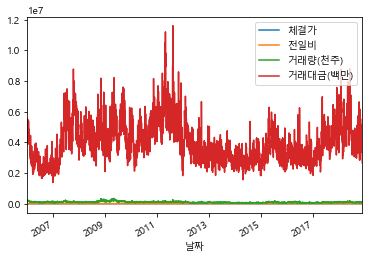

In [5]:
ax = df.plot()
figure = ax.figure
figure.savefig('일일주식현황.png', dpi=300)

In [9]:
import xlwings as xw

In [10]:
xw.__version__

'0.10.2'

In [11]:
sheet = xw.sheets.active

In [20]:
sheet.pictures.add(figure, name = '일일주식현황', update = True)

<Picture '일일주식현황' in <Sheet [통합 문서1]Sheet1>>

In [19]:
sheet.pictures

Pictures([<Picture '일일주식현황' in <Sheet [통합 문서1]Sheet1>>])

In [24]:
df.iloc[:10]

,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2018-11-23,266.33,1.43,-0.53%,58346,2670694
2018-11-22,267.76,0.51,-0.19%,63147,2917863
2018-11-21,268.27,1.31,-0.49%,79375,3726326
2018-11-20,269.58,2.73,-1.00%,79088,3667388
2018-11-19,272.31,0.66,+0.24%,73094,3401282
2018-11-16,271.65,0.11,+0.04%,72867,3382415
2018-11-15,271.54,2.66,+0.99%,72804,3522952
2018-11-14,268.88,0.82,-0.30%,85611,4249973
2018-11-13,269.70,1.87,-0.69%,85526,4513373


In [25]:
xw.view(df.iloc[:10], sheet=sheet)

C:\Users\oo92x\Anaconda3\lib\site-packages\xlwings\_xlwindows.py:1024: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  return _datetime_to_com_time(x)


In [65]:
sheet.range('A1').value = df.iloc[:10]

C:\Users\oo92x\Anaconda3\lib\site-packages\xlwings\_xlwindows.py:1024: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  return _datetime_to_com_time(x)


In [32]:
left = sheet.range('G1').left
top = sheet.range('G1').top

In [34]:
sheet.pictures.add(figure, name = '일일주식현황', update = True, left = left , top = top)

<Picture '일일주식현황' in <Sheet [통합 문서1]Sheet1>>

In [35]:
table_range = sheet.range('A1').expand()

In [38]:
picture_left = table_range.left + table_range.width+1
picture_top = table_range.top

In [44]:
sheet.pictures.add(figure, name = '일일주식현황', update = True, left = picture_left , top = picture_top)
table_range.columns.autofit()

In [57]:
def 엑셀에_반영(start_range, df, name):
    ax = df.plot(figsize=(7,4))
    start_range.value = df.iloc[:10]
    
    table_range = start_range.expand()
    left = table_range.left + table_range.width + 1
    top = table_range.top
    start_range.sheet.pictures.add(ax.figure, name = name, update = True, left = left ,top = top)
    table_range.columns.autofit()

In [49]:
xw.Range('C3')

<Range [통합 문서1]Sheet2!$C$3>

C:\Users\oo92x\Anaconda3\lib\site-packages\xlwings\_xlwindows.py:1024: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  return _datetime_to_com_time(x)


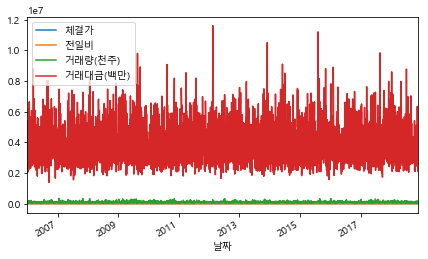

In [64]:
index = df.index
sample_df = df.sample(frac=1).reset_index(drop = True)
sample_df.index = index

엑셀에_반영(xw.Range('C3'), sample_df, '일일주식현황')